# Convolution


# ﻿

<img src="images/Convolution0.png" width=381px />

<img src="images/Convolution1.png" width=383px />

# What is Convolution?

__Convolution is a simple mathematical operation which is fundamental to many common image processing operators\.__

__Convolution provides a way of \`multiplying together' two arrays of numbers\, generally of different sizes\.__

__This can be used in image processing to implement operators whose output pixel values are simple linear combinations of certain input pixel values\.__

Flipping the kernel

<img src="images/Convolution2.gif" width=500px />

<img src="images/Convolution3.png" width=271px />

Filter/kernel

3x3

# ﻿

__Mathematically\,if__  _f_  __and__  _g_  __are discrete functions\, then__  _f\*g_  __is the convolution of__  _f_  __and__  _g_  __and is defined as:__

__Intuitively\, the convolution of two functions represents the amount of overlap between the two functions\. The function__  _g_  __is the ‘__  __input’__  __\,__  _f_  __the ‘kernel’ of the convolution__

<img src="images/Convolution4.png" width=249px />

# What is a kernel/Filter?

__The matrix which is designed for bringing out certain desired effects in our image created by a__  __particular__  __combination of pixels can be defined as kernel matrix\.__

__It is used for applying effects__  __on an image__  __like blurring\, sharpening\,outlining\,embossing\, edge detection\.__

<img src="images/Convolution5.png" width=388px />

# Types of Kernels

__Simple Box Blur →__

<img src="images/Convolution6.png" width=471px />

__Matrix →__

<img src="images/Convolution7.png" width=101px />

__Edge Detection →__

<img src="images/Convolution8.png" width=468px />

__Matrix →__

<img src="images/Convolution9.png" width=98px />

# ﻿



__Sobel Edge Operator →__

<img src="images/Convolution10.png" width=468px />


__Matrix →__

<img src="images/Convolution11.png" width=210px />

__Sharpening Operator →__

<img src="images/Convolution12.jpg" width=500px />

__Matrix →__

<img src="images/Convolution13.png" width=242px />

__Valid Convolution__  

<img src="images/Convolution14.gif" width=500px />

__Same Convolution__

<img src="images/Convolution15.gif" width=395px />

# Separable Convolution

__In 2D convolution with M×N kernel\, it requires M×N multiplications for each sample\. For example\, if the kernel size is 3x3\, then\, 9 multiplications and accumulations are necessary for each sample\. Thus\, convolution 2D is very expensive to perform multiply and accumulate operation\.__

__However\, if the kernel is separable\, then the computation can be reduced to M \+ N multiplications\.__

A matrix is separable if it can be decomposed into \(M×1\) and \(1×N\) matrices\.

For example;

And\, convolution with this separable kernel is equivalent to;

<img src="images/Convolution16.png" width=500px />

<img src="images/Convolution17.png" width=500px />

__As a result\, in order to reduce the computation\, we perform 1D convolution twice instead of 2D convolution; convolve with the input and M×1 kernel in vertical direction\, then convolve again horizontal direction with the result from the previous convolution and 1×N kernel\. The first vertical 1D convolution requires M times of multiplications and the horizontal convolution needs N times of multiplications\, altogether\, M\+N products\.__

__However\, the separable 2D convolution requires additional storage \(buffer\) to keep intermediate computations\. That is\, if you do vertical 1D convolution first\, you must preserve the results in a temporary buffer in order to use them for horizontal convolution subsequently\.__

__Notice that convolution is associative; the result is same\, even if the order of convolution is changed\. So\, you may convolve horizontal direction first then vertical direction later\.__

<img src="images/Convolution18.png" width=500px />

Gaussian smoothing filter is a well\-known separable matrix\. For example\, 3x3 Gaussian filter is

<span style="color:#666666">3x3 Gaussian Kernel</span>

<img src="images/Convolution19.png" width=500px />

# Uses

High pass filtering

High pass filtering refers to the attenuation of high frequencies in an image\,like noise

<img src="images/Convolution20.png" width=296px />

Example \(High Pass Filter\)

<img src="images/Convolution21.png" width=500px />

# Smoothing

* Visual smoothing of an image is mathematical averaging of pixel intensities
* Similar effect i\.e\. neighbor averaging
* Entries sum to one
  * Preserve image energy \(total luminance\)
  * No change in constant image areas

<img src="images/Convolution22.png" width=215px />

<img src="images/Convolution23.png" width=203px />

<img src="images/Convolution24.png" width=208px />

<img src="images/Convolution25.png" width=500px />

Original									

<img src="images/Convolution26.png" width=429px />

Smoothed

<img src="images/Convolution27.png" width=422px />

# Resources You can visit

https://setosa\.io/ev/image\-kernels/




# Suboptimal Convolution

Mathematically,if f and g are discrete functions, then f*g is the convolution of f and g and is defined as:
            
                

Intuitively, the convolution of two functions represents the amount of overlap between the two functions. The function g is the ‘input’ ,f the ‘kernel’ of the convolution

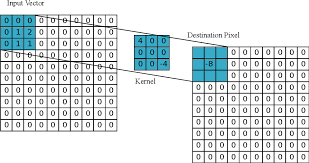

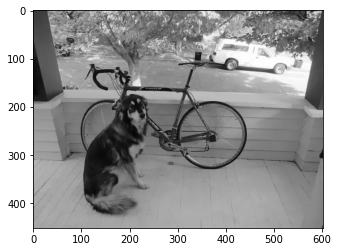

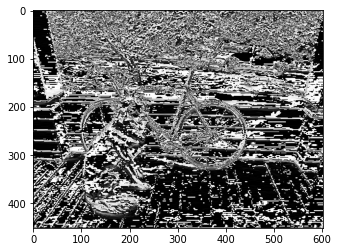

In [1]:
#############Suboptimal implementation of convolution #####################
import cv2
import numpy as np
import matplotlib.pyplot as plt

def convolve(kernel, orig_img):
    #####################Flip kernel suboptimally####################
    kernel_inv = np.copy(kernel)
    kernel_inv[0] = kernel[2]
    kernel_inv[2] = kernel[0]
    kernel_inv[:, 0] = kernel_inv[:, 2]
    kernel_inv[:, 2] = kernel_inv[:, 0]
    #################################################################
    img = cv2.copyMakeBorder(orig_img, 1, 1, 1, 1, cv2.BORDER_CONSTANT) # Add padding
    res_img = orig_img.copy()
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
                res_img[i - 1, j - 1] = np.sum(img[i - 1 : i + 2, j - 1 : j + 2] * kernel_inv[:, :])
    return res_img

orig_img = cv2.imread("./Assets/dog_test.png", 0) # Read Image
kernel = np.array([[ 1,  1,  1], [ 0,  0,  0], [-1, -1, -1]]) # Simple vertical gradient kernel

res = convolve(kernel, orig_img)

orig = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
plt.imshow(orig)
plt.show()
plt.imshow(res, cmap = plt.cm.gray)
plt.show()



The above code is purposefully kept in an unoptimized state, your task is to understand it and then improve it based on your understanding. Feel free to make any changes you deem useful.

Some points to be considered while thinking about optimizations are : 
 - Will it work for kernels having different sizes?
 - Can it handle images having different number of channels?
 - Can you improve space complexity of above implementation?
 Above points are given only for the purpose of giving a rough idea about possible optimizations and are not necessarily sufficient.